In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga set de datos limpio.

In [2]:
trata_exp = pd.read_csv('C:/Users/gisel/Downloads/tp/PP1-Grupo6/trata_exp.csv') 

# Regresión Lineal.

In [3]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

Variables a usar: "Year" y "Value" (la suma de los totales de casos por año).

In [4]:
numero_casos= trata_exp.groupby('Year')['Value'].sum().reset_index()

numero_casos

,Year,Value
0,2014,7954
1,2015,10961
2,2016,10959
3,2017,21794
4,2018,22252
5,2019,40266
6,2020,39023
7,2021,24267


Comportamiento de los datos.

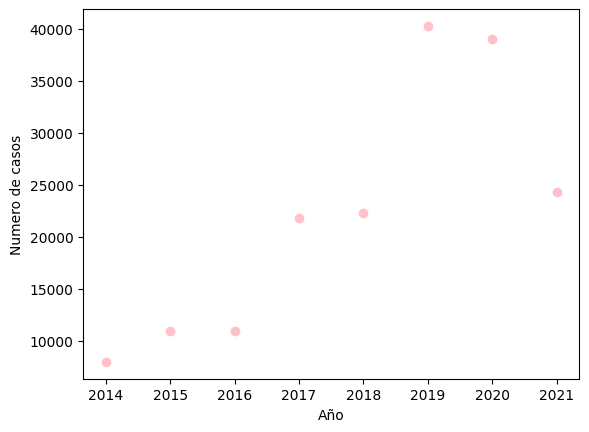

In [5]:
plt.ylabel("Numero de casos")
plt.xlabel("Año")
plt.scatter(numero_casos["Year"], numero_casos["Value"], color="pink")
plt.show()

Aplico el modelo.

In [6]:
regresion1 = linear_model.LinearRegression()

In [8]:
años1= numero_casos["Year"].values.reshape((-1,1))
años1

array([[2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021]], dtype=int64)

In [9]:
X= años1
y = numero_casos["Value"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Visualizar los datos de entrenamiento y de prueba.

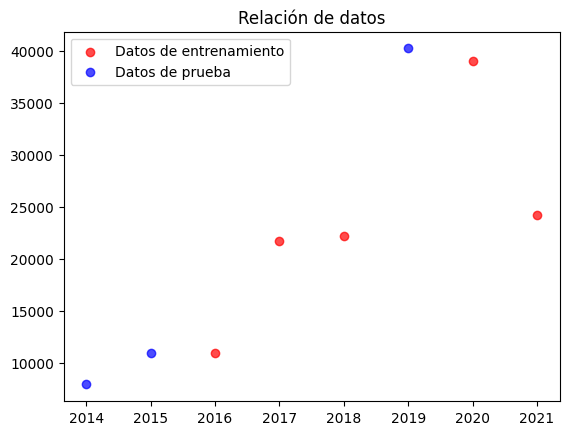

In [12]:
plt.scatter(X_train, y_train, label="Datos de entrenamiento", color="r", alpha=.7)
plt.scatter(X_test, y_test, label="Datos de prueba", color="b", alpha=.7)
plt.legend()
plt.title("Relación de datos")
plt.show()


Visualizar los datos a trabajar.

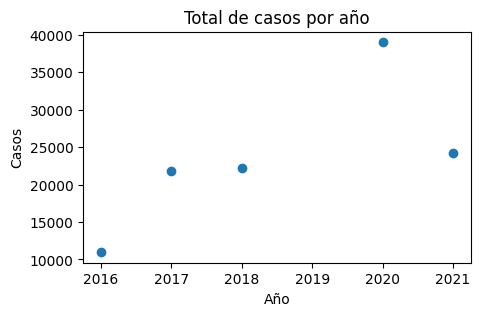

In [13]:
plt.figure(figsize= (5,3))
plt.scatter(X_train, y_train)
plt.ticklabel_format(style="plain")

plt.xlabel("Año")
plt.ylabel("Casos")
plt.title("Total de casos por año")
plt.show()

In [14]:
regr1 = LinearRegression()

In [15]:
regr1.fit(X_train,y_train)

LinearRegression()

In [16]:
print(f"Coeficiente :{regr1.coef_[0]}")

Coeficiente :3477.732558139534


In [17]:
print(f"Intercepto: {regr1.intercept_}")

Intercepto: -6995796.395348836


In [18]:
y_predict1 = regr1.predict (X_test)
y_predict1

array([11834.70930232, 25745.63953488,  8356.97674419])

Métricas.

R Cuadrado

In [20]:
from sklearn.metrics import r2_score

escor= r2_score(y_test, y_predict1)
escor

0.6677111445647981

Error Cuadrático Medio:

In [21]:
mse = mean_squared_error(y_test, y_predict1)
print(f"Error Cuadrático Medio (MSE): {mse}")

Error Cuadrático Medio (MSE): 70588875.41274996


Visualizar el resultado:

<function matplotlib.pyplot.show(close=None, block=None)>

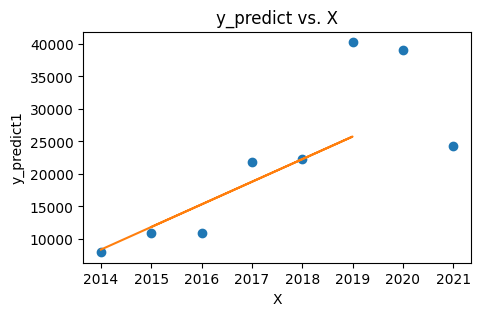

In [22]:
plt.figure(figsize=(5,3))
plt.plot(X, y, "o")
plt.plot(X_test,y_predict1)
plt.title ("y_predict vs. X")
plt.xlabel("X")
plt.ylabel("y_predict1")
plt.ticklabel_format(style="plain")
plt.show

Se pueden observar algunos valores atípicos a partir de 2019.

Predicción hasta el año 2040.

In [23]:
X_future1 = np.array(range(2021,2041)).reshape(-1,1)
X_future1.shape

(20, 1)

In [24]:
futuro1 =regr1.predict(X_future1)

<function matplotlib.pyplot.show(close=None, block=None)>

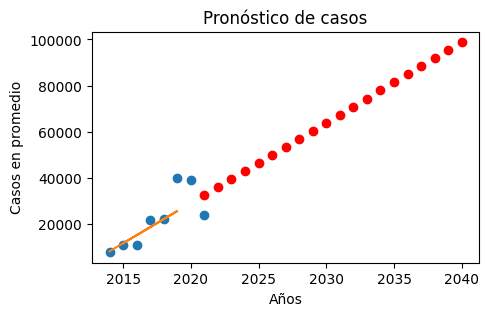

In [24]:
plt.figure(figsize=(5,3))
plt.plot(X, y, "o")
plt.plot(X_test, y_predict1)
plt.scatter(X_future1, futuro1, color= "red")
plt.title ("Pronóstico de casos")
plt.xlabel("Años")
plt.ylabel("Casos en promedio")
plt.ticklabel_format(style="plain")
plt.show

Cálculo en porcentajes en el aumento de casos por año.

In [25]:
ultimo_valor_2021 = numero_casos.loc[numero_casos["Year"] == 2021, "Value"].values[0]

porcentaje_aumento_por_anio = []
for i in range(len(X_future1)):
    nuevo_valor = futuro1[i]
    aumento_por_anio = ((nuevo_valor - ultimo_valor_2021) / ultimo_valor_2021) * 100
    porcentaje_aumento_por_anio.append(aumento_por_anio)

for i, anio in enumerate(range(2021, 2041)):
    print(f"Año {anio}: Porcentaje de aumento = {porcentaje_aumento_por_anio[i]:.2f}%")

Año 2021: Porcentaje de aumento = 34.76%
Año 2022: Porcentaje de aumento = 49.09%
Año 2023: Porcentaje de aumento = 63.42%
Año 2024: Porcentaje de aumento = 77.75%
Año 2025: Porcentaje de aumento = 92.08%
Año 2026: Porcentaje de aumento = 106.41%
Año 2027: Porcentaje de aumento = 120.74%
Año 2028: Porcentaje de aumento = 135.07%
Año 2029: Porcentaje de aumento = 149.40%
Año 2030: Porcentaje de aumento = 163.74%
Año 2031: Porcentaje de aumento = 178.07%
Año 2032: Porcentaje de aumento = 192.40%
Año 2033: Porcentaje de aumento = 206.73%
Año 2034: Porcentaje de aumento = 221.06%
Año 2035: Porcentaje de aumento = 235.39%
Año 2036: Porcentaje de aumento = 249.72%
Año 2037: Porcentaje de aumento = 264.05%
Año 2038: Porcentaje de aumento = 278.38%
Año 2039: Porcentaje de aumento = 292.72%
Año 2040: Porcentaje de aumento = 307.05%


Conclusión:

En esta regresión lineal a futuro se puede observar los aumentos de casos a lo largo de los años. Teniendo en cuanta los cálculos realizados en porcentaje, para el año 2040 aumentarian un 307,05% los casos de tráfico de personas.